In [1]:
import scvelo as scv 
import os

In [2]:
scv.set_figure_params()
os.getcwd()

adata = scv.read(filename = "../../6mo_MENS_11-25.h5ad")
adata

AnnData object with n_obs × n_vars = 2223 × 55487
    obs: 'barcode', 'sample', 'Total_UMIs', 'num_genes_expressed', 'mt_reads', 'total_reads', 'mito_ratio', 'Size_Factor', 'log10UMI', 'log10genes', 'cell_type', 'cycle_phase', 'cycle_G1_score', 'cycle_S_score', 'cycle_G2M_score', 'clusters', 'batch', 'assigned_cluster'
    var: 'gene_id_trimmed', 'gene_id', 'num_cells_expressed', 'gene_short_name'
    uns: 'cds_version', 'citations'
    obsm: 'Aligned', 'PCA', 'UMAP'
    layers: 'spliced', 'unspliced'

In [3]:
scv.pp.filter_and_normalize(adata, n_top_genes=2000) #min_shared_counts, #n_top_genes
scv.pp.moments(adata, n_pcs = 15) #n_pcs, n_neighbors



Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [4]:
scv.tl.recover_dynamics(adata, n_jobs = 16)
scv.tl.velocity(adata, mode='stochastic')

#adata.write('data/pancreas.h5ad', compression='gzip')
#adata = scv.read('data/pancreas.h5ad')

recovering dynamics (using 16/64 cores)


  0%|          | 0/98 [00:00<?, ?gene/s]

    finished (0:00:09) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


computing velocity graph (using 16/64 cores)


  0%|          | 0/2223 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
Renamed 'UMAP' to convention 'X_UMAP' (adata.obsm).
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_UMAP', embedded velocity vectors (adata.obsm)


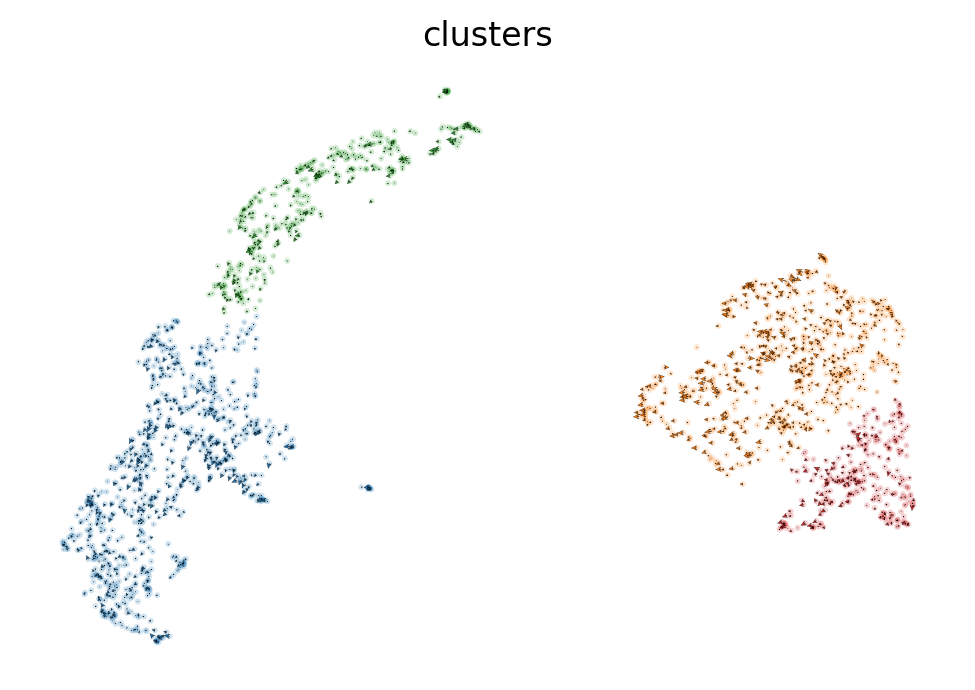

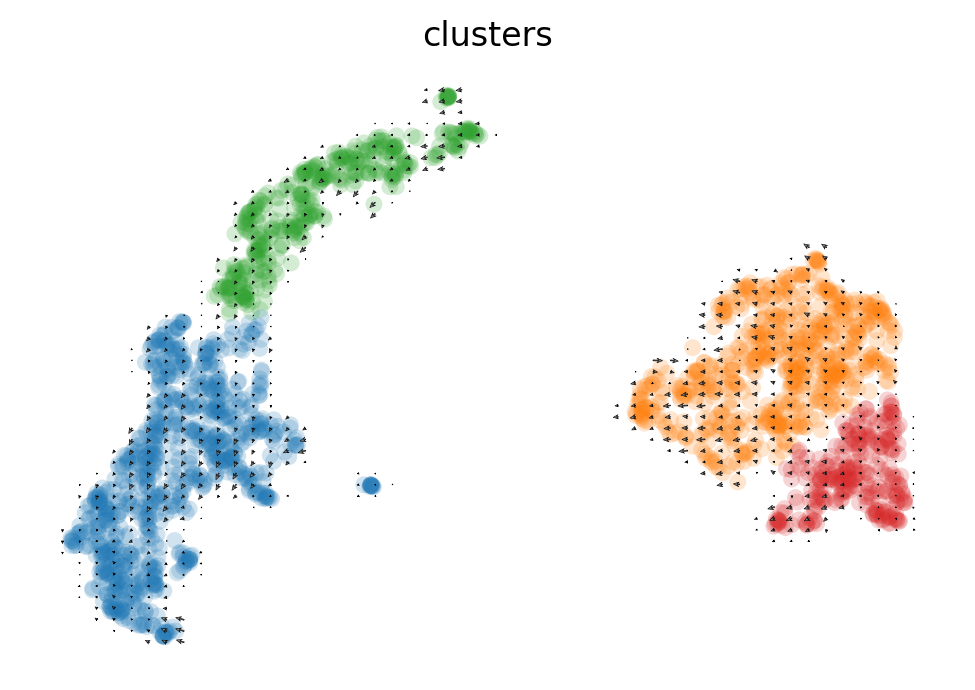

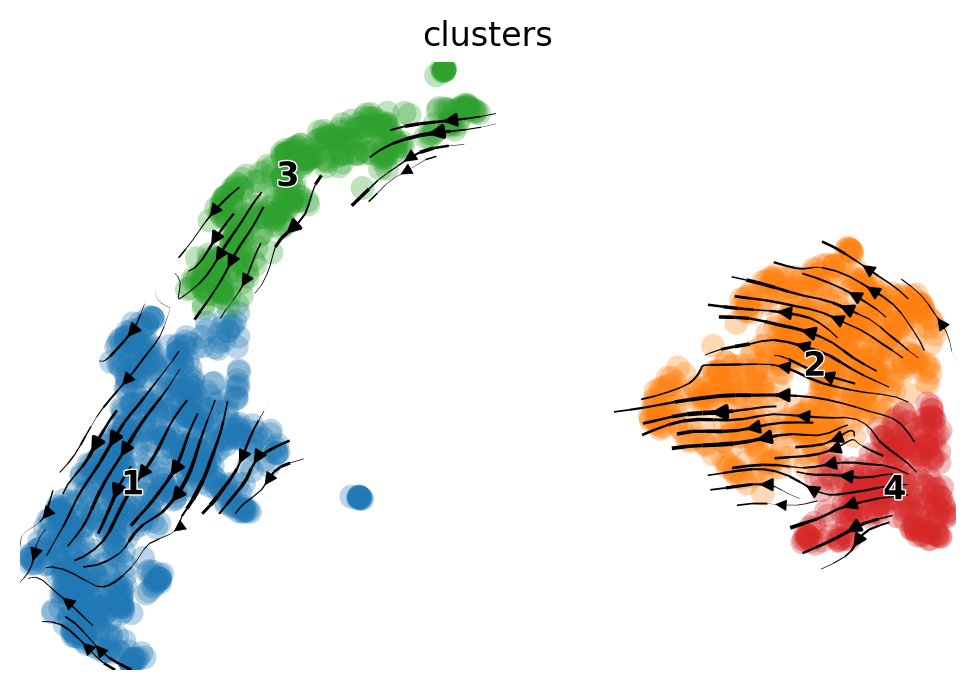

In [5]:
scv.tl.velocity_graph(adata, n_jobs = 16 )

scv.pl.velocity_embedding(adata, basis='UMAP')
scv.pl.velocity_embedding_grid(adata, basis='UMAP')
scv.pl.velocity_embedding_stream(adata, basis='UMAP')